# Regression on network backup dataset

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [140]:
data0 = pd.read_csv("network_backup_dataset.csv")

In [141]:
def plot_backup(number_of_days):
    backup_sum=np.zeros(5)
    day_sum0=[]
    day_sum1=[]
    day_sum2=[]
    day_sum3=[]
    day_sum4=[]
    if number_of_days==20:
        a=3538
    elif number_of_days==105:
        a=18588
        
    for i in range(1,a):
        if data0.iloc[i][1]==data0.iloc[i-1][1]:  # check the workflow name
            if data0.iloc[i][3]=='work_flow_0':
                backup_sum[0]+=data0.iloc[i][5]  #sum all the backup memory of work_flow_0 in same day
            elif data0.iloc[i][3]=='work_flow_1':
                backup_sum[1]+=data0.iloc[i][5]
            elif data0.iloc[i][3]=='work_flow_2':
                backup_sum[2]+=data0.iloc[i][5]
            elif data0.iloc[i][3]=='work_flow_3':
                backup_sum[3]+=data0.iloc[i][5]
            elif data0.iloc[i][3]=='work_flow_4':
                backup_sum[4]+=data0.iloc[i][5] 
        
            if i==a-1:
                day_sum0.append(backup_sum[0])      
                day_sum1.append(backup_sum[1])
                day_sum2.append(backup_sum[2])
                day_sum3.append(backup_sum[3])
                day_sum4.append(backup_sum[4])
        else:  
            day_sum0.append(backup_sum[0])      #append to day array the sum of a given day
            day_sum1.append(backup_sum[1])
            day_sum2.append(backup_sum[2])
            day_sum3.append(backup_sum[3])
            day_sum4.append(backup_sum[4])
            backup_sum=np.zeros(5)
            if data0.iloc[i][3]=='work_flow_0':
                backup_sum[0]=data0.iloc[i][5]  
            elif data0.iloc[i][3]=='work_flow_1':
                backup_sum[1]=data0.iloc[i][5]
            elif data0.iloc[i][3]=='work_flow_2':
                backup_sum[2]=data0.iloc[i][5]
            elif data0.iloc[i][3]=='work_flow_3':
                backup_sum[3]=data0.iloc[i][5]
            elif data0.iloc[i][3]=='work_flow_4':
                backup_sum[4]=data0.iloc[i][5]      
        
    day=[int(i) for i in range(1,number_of_days+1)]

    plt.plot(day,day_sum0,'b',label='work_flow_0')
    plt.plot(day,day_sum1,'g',label='work_flow_1')
    plt.plot(day,day_sum2,'r',label='work_flow_2')
    plt.plot(day,day_sum3,'c',label='work_flow_3')
    plt.plot(day,day_sum4,'y',label='work_flow_4')
    plt.legend(loc=1,ncol=1, borderaxespad=0.)
    plt.title('First '+str(number_of_days)+' days')
    plt.show()

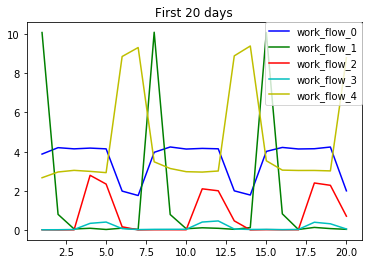

In [142]:
plot_backup(20)

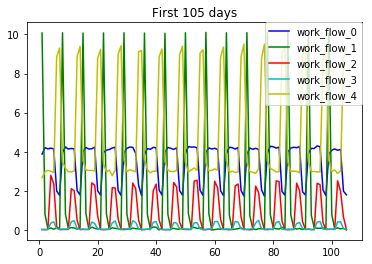

In [143]:
plot_backup(105)

In [144]:
data1 = pd.read_csv("network_backup_dataset.csv")
data1.drop('Backup Time (hour)', axis = 1, inplace = True)
backupsize = data1['Size of Backup (GB)']
#print(backupsize)
y=backupsize.values
#print(y)
data1.drop('Size of Backup (GB)', axis = 1, inplace = True)

# Linear regression

## Scaler Encoding

In [145]:
# Monday-Sunday corresponds to 1-7
# work-flow-0 to work-flow-4 corresponds  1-5

def convert_to_scalar1(data):
    data_new=data
    day_of_week={
        "Monday":1,
        "Tuesday":2,
        "Wednesday":3,
        "Thursday":4,
        "Friday":5,
        "Saturday":6,
        "Sunday":7
    }
    file_name={
        'File_0':0,'File_1':1,'File_2':2,'File_3':3,'File_4':4,'File_5':5,
        'File_6':6,'File_7':7,'File_8':8,'File_9':9,'File_10':10,'File_11':11,
        'File_12':12,'File_13':13,'File_14':14,'File_15':15,'File_16':16,'File_17':17,
        'File_18':18,'File_19':19,'File_20':20,'File_21':21,'File_22':22,'File_23':23,
        'File_24':24,'File_25':25,'File_26':26,'File_27':27,'File_28':28,'File_29':29
    }
    
    Work_flow_ID={
        'work_flow_0':1,
        'work_flow_1':2,
        'work_flow_2':3,
        'work_flow_3':4,
        'work_flow_4':5
    }
    for key in day_of_week:
        data_new=data_new.replace(key,day_of_week[key])
    for key in file_name:
        data_new=data_new.replace(key,file_name[key])
    for key in Work_flow_ID:
        data_new=data_new.replace(key,Work_flow_ID[key])

    return data_new

In [146]:
new= convert_to_scalar1(data1)
print (new.values)

[[ 1  1  1  1  0]
 [ 1  1  1  3 12]
 [ 1  1  1  3 13]
 ..., 
 [15  7 21  5 26]
 [15  7 21  5 25]
 [15  7 21  5 24]]


In [147]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

def model_building(model,dataset, prediction): 
    train,test = [],[]
    foldnumber = KFold(n_splits = 10, random_state = None, shuffle = False)
    #regr = linear_model.LinearRegression()
    for train_index, test_index in foldnumber.split(dataset):
        X_train, X_test = dataset[train_index], dataset[test_index]
        y_train, y_test = backupsize[train_index], backupsize[test_index]
        model.fit(X_train, y_train)
        train_pred_y = model.predict(X_train)
        test_pred_y = model.predict(X_test)
        for i in range(len(test_index)):
            prediction[test_index[i]] = test_pred_y[i]
        train.append(mean_squared_error(y_train, train_pred_y))
        test.append(mean_squared_error(y_test, test_pred_y))
    print("training RMSE: %lf" %sqrt(np.mean(train)), "testing RMSE: %lf" %sqrt(np.mean(test)))
    return sqrt(np.mean(train)), sqrt(np.mean(test))  

In [148]:
def plotScatter2(Y_fitted,Y,regressor_name):
    index=[i for i in range(1,2001)]
    index=np.asarray(index)
    Y_plot=Y[0:2000]
    Y_fitted_plot=Y_fitted[0:2000]
    plt.figure(figsize=(10,8))
    plt.scatter(index,Y_plot,c='b',label='True value')
    plt.scatter(index,Y_fitted_plot,c='r',label='Fitted value')
    plt.title('fitted vs true value for '+regressor_name)
    plt.legend(loc=1,ncol=1, borderaxespad=0.)
    plt.show()

    Y_residual=Y_plot-Y_fitted_plot
    plt.figure(figsize=(10,8))
    plt.scatter(index,Y_residual,c='g',label='Residual')
    plt.scatter(index,Y_fitted_plot,c='y',label='Fitted value')
    plt.title('Residual vs Fitted value for '+regressor_name)
    plt.legend(loc=1,ncol=1, borderaxespad=0.)
    plt.show()

training RMSE: 0.103585 testing RMSE: 0.103676


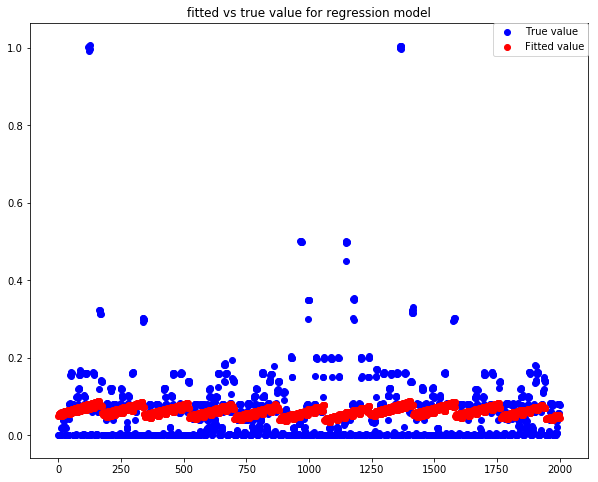

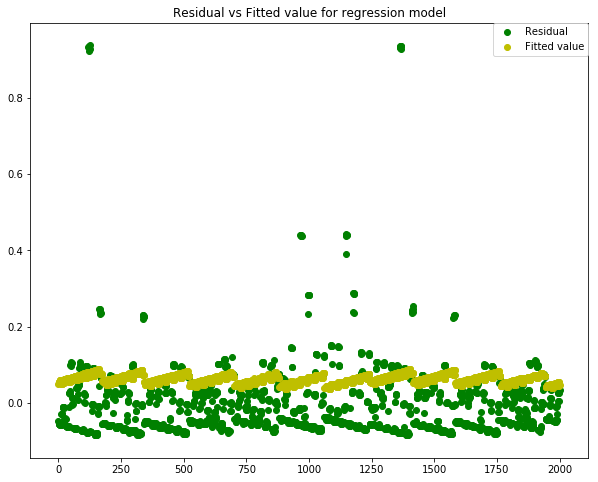

In [149]:
prediction = [0 for i in range(len(data1))]
model_building(LinearRegression(),new.values,prediction)
plotScatter2(prediction, backupsize,"regression model")

# Random Forest

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.tree import export_graphviz
import warnings
import os
from PIL import Image
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPRegressor

warnings.filterwarnings("ignore")
data= pd.read_csv('network_backup_dataset.csv')

In [152]:
data_new=convert_to_scalar1(data)
#data_new

In [153]:
Y=data_new['Size of Backup (GB)']
X=data_new.drop(['Size of Backup (GB)','Backup Time (hour)'],1)
regr=RandomForestRegressor(n_estimators=20,max_depth=4,max_features=5,bootstrap=True,oob_score=True)
regr.fit(X,Y)
out_of_bag_error=1-regr.oob_score_
print('out_of_bag_error',out_of_bag_error)
cv_results = cross_validate(regr, X, Y, cv=10, return_train_score=True,scoring='neg_mean_squared_error')
RMSE_train=np.sqrt(np.mean(-cv_results['train_score']))
RMSE_test=np.sqrt(np.mean(-cv_results['test_score']))
print('average RMSE_train',RMSE_train)
print('average RMSE_test',RMSE_test)

out_of_bag_error 0.333034210466
average RMSE_train 0.0603372469212
average RMSE_test 0.0605228481365


## Hyperparameter Tuning 

In [154]:


n_tree=[int(i) for i in range(1,201)]
max_features=[int(i) for i in range(1,6)]
average_RMSE_test_list=np.zeros((5,200))
oob_list=np.zeros((5,200))



for j in max_features:
    for i in n_tree:
        regr=RandomForestRegressor(n_estimators=i,max_depth=4,max_features=j,bootstrap=True,oob_score=True,n_jobs=-1)
        regr.fit(X,Y)
        out_of_bag_error=1-regr.oob_score_
        oob_list[j-1,i-1]=out_of_bag_error
        
    
        cv_results = cross_validate(regr, X, Y, cv=10, return_train_score=True,scoring='neg_mean_squared_error',n_jobs=-1)
        average_RMSE_test=(1/10)*np.sum(np.sqrt(-cv_results['test_score']))
        average_RMSE_test_list[j-1,i-1]=average_RMSE_test
        if i%20==0:
            print(j,'and',i,'epochs')

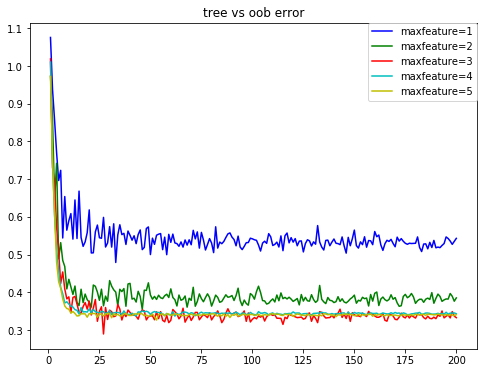

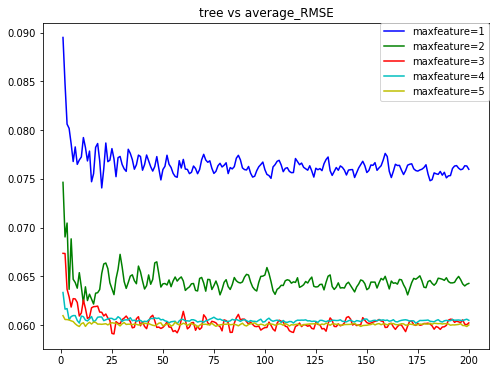

mean oob error with maxfeature 1 is 0.547926323712
mean oob error with maxfeature 2 is 0.396373257175
mean oob error with maxfeature 3 is 0.349991165259
mean oob error with maxfeature 4 is 0.353695401574
mean oob error with maxfeature 5 is 0.348737983621
mean RMSE with maxfeature 1 is 0.0764226401739
mean RMSE with maxfeature 2 is 0.064472351582
mean RMSE with maxfeature 3 is 0.0603283614143
mean RMSE with maxfeature 4 is 0.0605090840799
mean RMSE with maxfeature 5 is 0.060084495121
[52]
[66]


In [156]:
plt.figure(num=2,figsize=(8,6))
plt.plot(n_tree,oob_list[0,:],'b',label='maxfeature=1')
plt.plot(n_tree,oob_list[1,:],'g',label='maxfeature=2')
plt.plot(n_tree,oob_list[2,:],'r',label='maxfeature=3')
plt.plot(n_tree,oob_list[3,:],'c',label='maxfeature=4')
plt.plot(n_tree,oob_list[4,:],'y',label='maxfeature=5')
plt.title('tree vs oob error')
plt.legend(loc=1,ncol=1, borderaxespad=0.)
plt.show()

plt.figure(num=2,figsize=(8,6))
plt.plot(n_tree,average_RMSE_test_list[0,:],'b',label='maxfeature=1')
plt.plot(n_tree,average_RMSE_test_list[1,:],'g',label='maxfeature=2')
plt.plot(n_tree,average_RMSE_test_list[2,:],'r',label='maxfeature=3')
plt.plot(n_tree,average_RMSE_test_list[3,:],'c',label='maxfeature=4')
plt.plot(n_tree,average_RMSE_test_list[4,:],'y',label='maxfeature=5')
plt.title('tree vs average_RMSE')
plt.legend(loc=1,ncol=1, borderaxespad=0.)
plt.show()

for i in range(5):
    print('mean oob error with maxfeature',i+1,'is',np.average(oob_list[i,:]))
    
for i in range(5):
    print('mean RMSE with maxfeature',i+1,'is',np.average(average_RMSE_test_list[i,:]))

# return index of lowest value in a list
m_o=min(oob_list[4,:])
print([i for i, j in enumerate(oob_list[4,:]) if j == m_o])
m_r=min(average_RMSE_test_list[4,:])
print([i for i, j in enumerate(average_RMSE_test_list[4,:]) if j == m_r])

In [157]:
#Question 2b (iii)
#pick Max-depth as another parameter to test on.
#With maxfeature set at 5.
#We sweep number of tree from 10 to 40 against depth of tree from 4 to 10

In [158]:
max_depth=[i for i in range(4,11)]
n_tree2=[i for i in range(11,41)]
average_RMSE_test_list2=np.zeros((7,30))
oob_list2=np.zeros((7,30))

for j in max_depth:
    for i in n_tree2:
        regr=RandomForestRegressor(n_estimators=i,max_depth=j,max_features=5,bootstrap=True,oob_score=True,n_jobs=-1)
        regr.fit(X,Y)
        out_of_bag_error=1-regr.oob_score_
        oob_list2[j-4,i-11]=out_of_bag_error
        
    
        cv_results = cross_validate(regr, X, Y, cv=10, return_train_score=True,scoring='neg_mean_squared_error',n_jobs=-1)
        average_RMSE_test=(1/10)*np.sum(np.sqrt(-cv_results['test_score']))
        average_RMSE_test_list2[j-4,i-11]=average_RMSE_test
        if i%10==0:
            print(j,'and',i,'epochs')


4 and 20 epochs
4 and 30 epochs
4 and 40 epochs
5 and 20 epochs
5 and 30 epochs
5 and 40 epochs
6 and 20 epochs
6 and 30 epochs
6 and 40 epochs
7 and 20 epochs
7 and 30 epochs
7 and 40 epochs
8 and 20 epochs
8 and 30 epochs
8 and 40 epochs
9 and 20 epochs
9 and 30 epochs
9 and 40 epochs
10 and 20 epochs
10 and 30 epochs
10 and 40 epochs


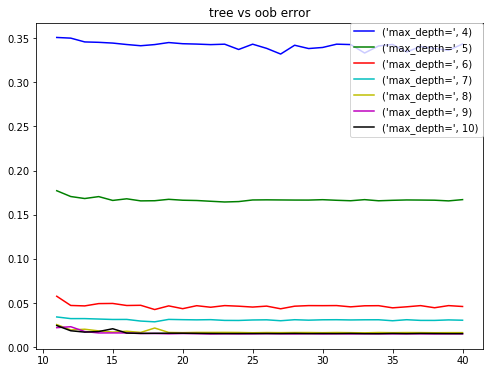

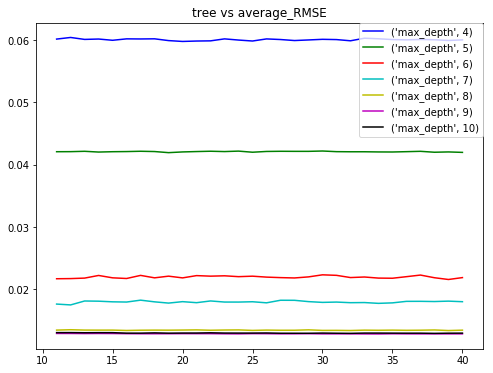

In [159]:
colors=['b','g','r','c','y','m','k']
plt.figure(num=1,figsize=(8,6))
for i in range(7):
    plt.plot(n_tree2,oob_list2[i,:],colors[i],label=('max_depth=',i+4))
             
plt.title('tree vs oob error')
plt.legend(loc=1,ncol=1, borderaxespad=0.)
plt.show()

plt.figure(num=2,figsize=(8,6))
for i in range(7):
    plt.plot(n_tree2,average_RMSE_test_list2[i,:],colors[i],label=('max_depth',i+4))

plt.title('tree vs average_RMSE')
plt.legend(loc=1,ncol=1, borderaxespad=0.)
plt.show()

## Feature Importance

In [160]:
#X[3] Backup Start Time - Hour of Day has highest importance

In [161]:
forest=RandomForestRegressor(n_estimators=20,max_depth=9,max_features=5,bootstrap=True,oob_score=True,n_jobs=-1)
forest.fit(X, Y)
importances = forest.feature_importances_
print(importances)

[ 0.00165923  0.20166215  0.39319809  0.11838293  0.2850976 ]


In [162]:
#Question 2b (v)
#Tree visualization:Root node is the node at the top X[4], however this is not the most important feature. Thereason is that, sklearn RandomForest uses Gini importance and Gini importance ​calculateseach feature importance as​ the sum over the number of splits​ across all trees. Thus, the rootnode is not necessarily the important feature

In [163]:
#install graphviz needed

In [164]:
forest2=RandomForestRegressor(n_estimators=20,max_depth=4,max_features=5,bootstrap=True,oob_score=True,n_jobs=-1)
forest2.fit(X, Y)
estimator=forest2.estimators_[0] # extract one tree
# Export as dot file
feature_names=['Week #','Day of Week','backup Start Time - Hour of Day','Work-Flow-ID','File Name']

export_graphviz(estimator, out_file="tree.dot"
                )

# Convert to png

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')


In [165]:
def plotScatter(Y_fitted,Y,data_number,regressor_name):
    index=[i for i in range(1,data_number+1)]
    index=np.asarray(index)
    Y_plot=Y[0:data_number]
    Y_fitted_plot=Y_fitted[0:data_number]
    plt.figure(figsize=(10,8))
    plt.scatter(index,Y_plot,c='b',label='True value')
    plt.scatter(index,Y_fitted_plot,c='r',label='Fitted value')
    plt.title('fitted vs true value for '+regressor_name)
    plt.legend(loc=1,ncol=1, borderaxespad=0.)
    plt.show()

    Y_residual=Y_plot-Y_fitted_plot
    plt.figure(figsize=(10,8))
    plt.scatter(index,Y_residual,c='g',label='Residual')
    plt.scatter(index,Y_fitted_plot,c='y',label='Fitted value')
    plt.title('Residual vs Fitted value for '+regressor_name)
    plt.legend(loc=1,ncol=1, borderaxespad=0.)
    plt.show()

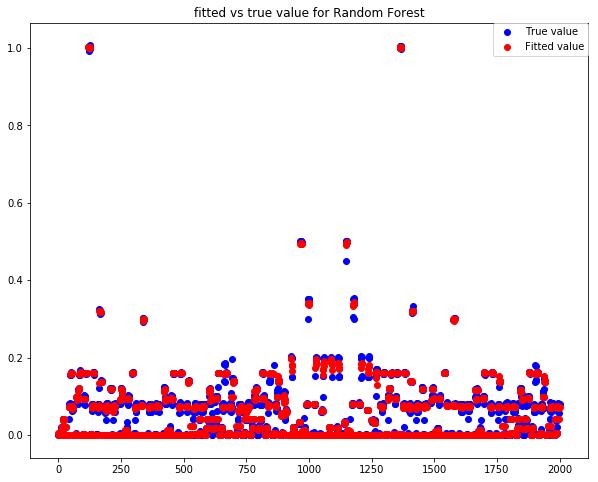

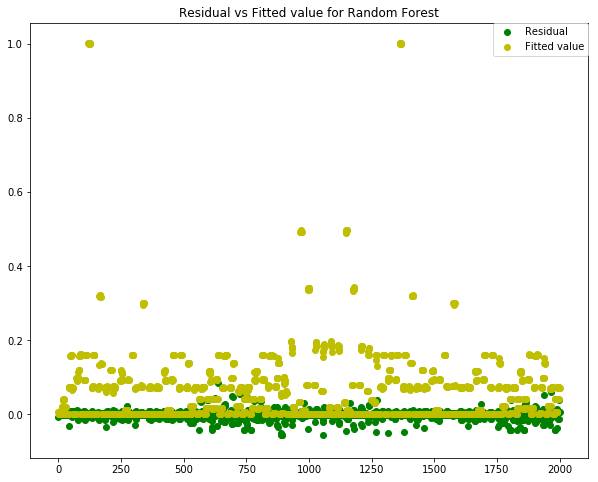

In [166]:
forest=RandomForestRegressor(n_estimators=20,max_depth=9,max_features=5,bootstrap=True,oob_score=True,n_jobs=-1)
forest.fit(X, Y)
Y_fitted=forest.predict(X)
plotScatter(Y_fitted,Y,2000,'Random Forest')

## Neural Network

In [168]:
X_c=data_new.drop(['Size of Backup (GB)','Backup Time (hour)'],1)
Y_c=data_new['Size of Backup (GB)']
enc = OneHotEncoder(handle_unknown='ignore')
X_c=enc.fit_transform(X_c).toarray()

hidden_units=[2,5,10,50,100,150,200,250,300,350,400,450,500,550,600]


relu_RMSE=[]
tanh_RMSE=[]
logistic_RMSE=[]
j=0
for i in hidden_units:
    neural_regressor = MLPRegressor(hidden_layer_sizes=(i),activation='relu')
    cv_results = cross_validate(neural_regressor, X_c, Y_c, cv=10, return_train_score=True,scoring='neg_mean_squared_error',n_jobs=-1)
    average_RMSE_test=(1/10)*np.sum(np.sqrt(-cv_results['test_score']))
    relu_RMSE.append(average_RMSE_test)
    
    neural_regressor = MLPRegressor(hidden_layer_sizes=(i),activation='logistic')
    cv_results = cross_validate(neural_regressor, X_c, Y_c, cv=10, return_train_score=True,scoring='neg_mean_squared_error',n_jobs=-1)
    average_RMSE_test=(1/10)*np.sum(np.sqrt(-cv_results['test_score']))
    logistic_RMSE.append(average_RMSE_test)
    
    neural_regressor = MLPRegressor(hidden_layer_sizes=(i),activation='tanh')
    cv_results = cross_validate(neural_regressor, X_c, Y_c, cv=10, return_train_score=True,scoring='neg_mean_squared_error',n_jobs=-1)
    average_RMSE_test=(1/10)*np.sum(np.sqrt(-cv_results['test_score']))
    tanh_RMSE.append(average_RMSE_test)
    print(j)
    j=j+1



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


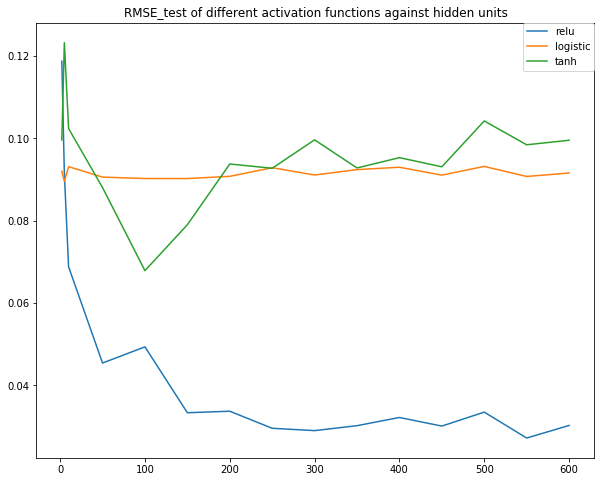

min of relu: 0.0272460003794
index of min: [13]
min of tanh: 0.06786485676
index of min: [4]


In [169]:
plt.figure(figsize=(10,8))
plt.plot(hidden_units,relu_RMSE,label='relu')
plt.plot(hidden_units,logistic_RMSE,label='logistic')
plt.plot(hidden_units,tanh_RMSE,label='tanh')
plt.title('RMSE_test of different activation functions against hidden units')
plt.legend(loc=1,ncol=1, borderaxespad=0.)
plt.show()
m=min(relu_RMSE)
print('min of relu:',m)
print('index of min:',[i for i, j in enumerate(relu_RMSE) if j == m])
m=min(tanh_RMSE)
print('min of tanh:',m)
print('index of min:',[i for i, j in enumerate(tanh_RMSE) if j == m])

In [170]:
best_neural_regressor = MLPRegressor(hidden_layer_sizes=600,activation='relu')
neural_cv_results = cross_validate(neural_regressor, X_c, Y_c, cv=10, return_train_score=True,scoring='neg_mean_squared_error',n_jobs=-1)
print('cross validation train results for neural network',np.sqrt(np.mean(-neural_cv_results['train_score']) ))
print('cross validation test results for neural network',np.sqrt(np.mean(-neural_cv_results['test_score']) ))
best_neural_regressor.fit(X_c,Y_c)
Y_neural_fitted=best_neural_regressor.predict(X_c)

cross validation train results for neural network 0.092741693411
cross validation test results for neural network 0.0999134714575


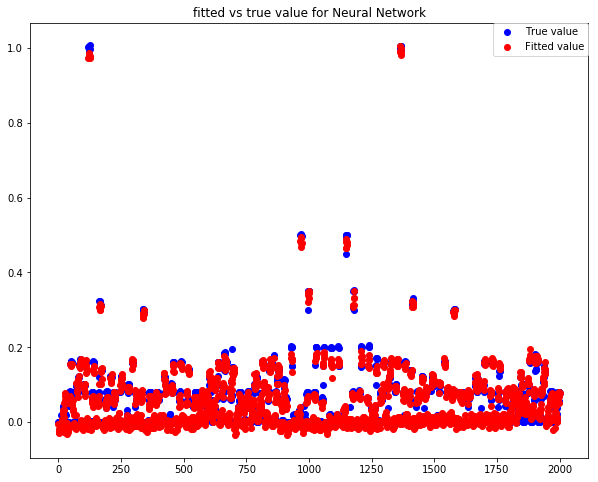

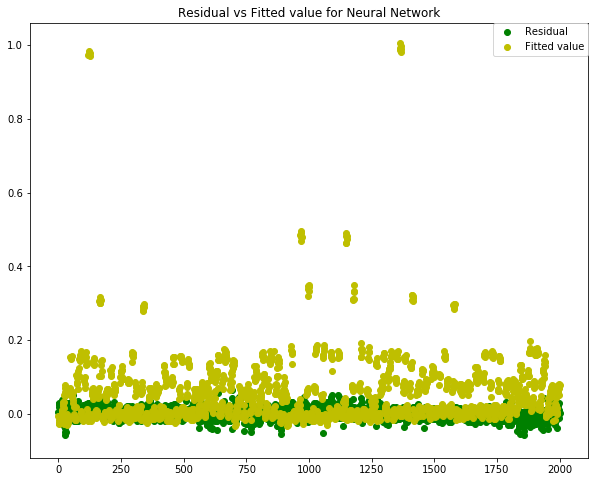

0.092741693411
0.0999134714575


In [171]:
plotScatter(Y_neural_fitted,Y_c,2000,'Neural Network')
print(np.sqrt(np.mean(-neural_cv_results['train_score']) ))
print(np.sqrt(np.mean(-neural_cv_results['test_score']) ))

In [1]:
## Use Linear Regression to predict Each Workflow seperately

In [173]:
valued = pd.read_csv("network_backup_dataset.csv")
valued.drop('Backup Time (hour)', axis=1, inplace=True)
newd= convert_to_scalar1(valued)

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from math import sqrt
def linear_regression(Linear, X, y):
    foldnumber = KFold(n_splits = 10, random_state = None, shuffle = False)
    train, test = [0, 0]
    for train_index, test_index in foldnumber.split(X):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        Linear.fit(X_train, y_train)
        train =  train+mean_squared_error(y_train, Linear.predict(X_train))
        test =  test+mean_squared_error(y_test, Linear.predict(X_test))
    return sqrt(train / 10), sqrt(test / 10)

In [175]:
Xs, ys = [], []
for key, valued in newd.groupby('Work-Flow-ID').groups.items():
    group = newd.loc[valued].drop('Work-Flow-ID', axis=1).reset_index(drop=True)
    Xs.append(group.drop('Size of Backup (GB)', axis=1))
    ys.append(group['Size of Backup (GB)'])

In [176]:
for i in range(len(ys)):
    train, test = linear_regression(LinearRegression(), Xs[i], ys[i])
    print("%s: RMSE_train = %f RMSE_test = %f" % ('work_flow_'+str(i), train, test))

work_flow_0: RMSE_train = 0.035836 RMSE_test = 0.035887
work_flow_1: RMSE_train = 0.148766 RMSE_test = 0.148919
work_flow_2: RMSE_train = 0.042909 RMSE_test = 0.043067
work_flow_3: RMSE_train = 0.007244 RMSE_test = 0.007261
work_flow_4: RMSE_train = 0.085922 RMSE_test = 0.085991


In [177]:
from sklearn.preprocessing import PolynomialFeatures 
def create_polynomial_regression_model(degree,X,Y):
    foldnumber = KFold(n_splits = 10)
    rmse_train,rmse_test =[0,0]
    poly_features = PolynomialFeatures(degree=degree)
    for train_index, test_index in foldnumber.split(X):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        Y_train, Y_test = Y.loc[train_index], Y.loc[test_index]
        X_train_poly = poly_features.fit_transform(X_train)
        poly_model = LinearRegression()
        poly_model.fit(X_train_poly, Y_train)
        Y_train_predicted = poly_model.predict(X_train_poly)
        Y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

        rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_predicted))
        rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_predict))
        
    return sqrt(rmse_train / 10), sqrt(rmse_test / 10)

The degree of polynomial is 2
work_flow_0: RMSE_train = 0.029519 RMSE_test = 0.029540
work_flow_1: RMSE_train = 0.129844 RMSE_test = 0.130097
work_flow_2: RMSE_train = 0.038460 RMSE_test = 0.038860
work_flow_3: RMSE_train = 0.006380 RMSE_test = 0.006426
work_flow_4: RMSE_train = 0.069192 RMSE_test = 0.069341
The degree of polynomial is 3
work_flow_0: RMSE_train = 0.026310 RMSE_test = 0.026388
work_flow_1: RMSE_train = 0.111134 RMSE_test = 0.111459
work_flow_2: RMSE_train = 0.034470 RMSE_test = 0.034852
work_flow_3: RMSE_train = 0.006024 RMSE_test = 0.006079
work_flow_4: RMSE_train = 0.060862 RMSE_test = 0.061113
The degree of polynomial is 4
work_flow_0: RMSE_train = 0.024962 RMSE_test = 0.025151
work_flow_1: RMSE_train = 0.089392 RMSE_test = 0.089623
work_flow_2: RMSE_train = 0.031824 RMSE_test = 0.032836
work_flow_3: RMSE_train = 0.005453 RMSE_test = 0.005622
work_flow_4: RMSE_train = 0.048941 RMSE_test = 0.049574
The degree of polynomial is 5
work_flow_0: RMSE_train = 0.018209 RMSE_

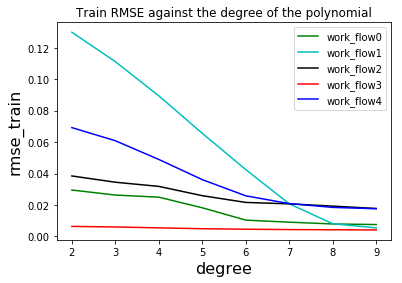

In [178]:
from sklearn.pipeline import make_pipeline
xaxis = np.arange(2, 6)
deg=[]
rmse_trainerr=[]
rmse_testerr=[]
sum_err=[]
flow0=[]
flow1=[]
flow2=[]
flow3=[]
flow3=[]
for d in range (2,10,1):
    degree=d
    deg.append(d)
    print('The degree of polynomial is ' + str(d))
    for i in range(len(ys)):
        model = make_pipeline(PolynomialFeatures(degree, include_bias=False), LinearRegression())
        rmse_train, rmse_test = linear_regression(model, Xs[i], ys[i])
        #rmse_train,rmse_test = create_polynomial_regression_model(degree, Xs[i], ys[i])
        print("%s: RMSE_train = %f RMSE_test = %f" % ('work_flow_'+str(i), rmse_train, rmse_test))
        rmse_trainerr.append(rmse_train)
        rmse_testerr.append(rmse_test)
    sum_err.append(rmse_train+rmse_test)

indices0=(0,5,10,15,20,25,30,35)
indices1=(1,6,11,16,21,26,31,36)
indices2=(2,7,12,17,22,27,32,37)
indices3=(3,8,13,18,23,28,33,38)
indices4=(4,9,14,19,24,29,34,39)

flow0=[rmse_trainerr[i] for i in indices0]
flow1=[rmse_trainerr[i] for i in indices1]
flow2=[rmse_trainerr[i] for i in indices2]
flow3=[rmse_trainerr[i] for i in indices3]
flow4=[rmse_trainerr[i] for i in indices4]


plt.title('Train RMSE against the degree of the polynomial')
plt.xlabel('degree',fontsize = 16)
plt.ylabel('rmse_train', fontsize = 16)
plt.plot(deg, flow0,'-g',label='work_flow0')#x=np.array()
plt.plot(deg, flow1, '-c',label='work_flow1')
plt.plot(deg, flow2, '-k',label='work_flow2')
plt.plot(deg, flow3, '-r',label='work_flow3')
plt.plot(deg, flow4, '-b',label='work_flow4')

plt.legend(loc = 'best')
plt.show()    

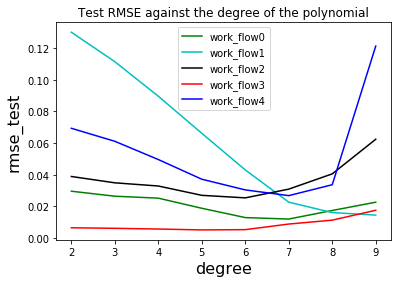

In [179]:
flow01=[]
flow11=[]
flow21=[]
flow31=[]
flow41=[]
flow01=[rmse_testerr[i] for i in indices0]
flow11=[rmse_testerr[i] for i in indices1]
flow21=[rmse_testerr[i] for i in indices2]
flow31=[rmse_testerr[i] for i in indices3]
flow41=[rmse_testerr[i] for i in indices4]

plt.title('Test RMSE against the degree of the polynomial')
plt.xlabel('degree',fontsize = 16)
plt.ylabel('rmse_test', fontsize = 16)
plt.plot(deg, flow01,'-g',label='work_flow0')#x=np.array()
plt.plot(deg, flow11, '-c',label='work_flow1')
plt.plot(deg, flow21, '-k',label='work_flow2')
plt.plot(deg, flow31, '-r',label='work_flow3')
plt.plot(deg, flow41, '-b',label='work_flow4')
plt.legend(loc = 'best')
plt.show()    

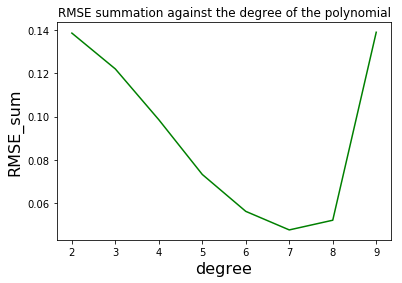

In [180]:

plt.title('RMSE summation against the degree of the polynomial')
plt.xlabel('degree',fontsize = 16)
plt.ylabel('RMSE_sum', fontsize = 16)
plt.plot(deg, sum_err,'-g',label='')#x=np.array()

plt.legend(loc = 'best')
plt.show() 


In [183]:
def plotScatterd(Y_fitted,Y,regressor_name):
    index=[i for i in range(1,2001)]
    index=np.asarray(index)
    Y_plot=Y[0:2000]
    Y_fitted_plot=Y_fitted[0:2000]
    plt.figure(figsize=(10,8))
    plt.scatter(index,Y_plot,c='b',label='True value')
    plt.scatter(index,Y_fitted_plot,c='r',label='Fitted value')
    plt.title('fitted vs true value for '+regressor_name)
    plt.legend(loc=1,ncol=1, borderaxespad=0.)
    plt.show()

    Y_residual=Y_plot-Y_fitted_plot
    
    plt.figure(figsize=(10,8))
    plt.scatter(index,Y_residual,c='g',label='Residual')
    plt.scatter(index,Y_fitted_plot,c='y',label='Fitted value')
    plt.title('Residual vs Fitted value for '+regressor_name)
    plt.legend(loc=1,ncol=1, borderaxespad=0.)
    plt.show()

In [184]:
def convert_to_scalar(data):
    data_new=data
    day_of_week={
        "Monday":1,
        "Tuesday":2,
        "Wednesday":3,
        "Thursday":4,
        "Friday":5,
        "Saturday":6,
        "Sunday":7
    }
    file_name={
        'File_0':1,'File_1':2,'File_2':3,'File_3':4,'File_4':5,'File_5':6,
        'File_6':7,'File_7':8,'File_8':9,'File_9':10,'File_10':11,'File_11':12,
        'File_12':13,'File_13':14,'File_14':15,'File_15':16,'File_16':17,'File_17':18,
        'File_18':19,'File_19':20,'File_20':21,'File_21':22,'File_22':23,'File_23':24,
        'File_24':25,'File_25':26,'File_26':27,'File_27':28,'File_28':29,'File_29':30
    }
    
    Work_flow_ID={
        'work_flow_0':1,
        'work_flow_1':2,
        'work_flow_2':3,
        'work_flow_3':4,
        'work_flow_4':5
    }
    for key in day_of_week:
        data_new=data_new.replace(key,day_of_week[key])
    for key in file_name:
        data_new=data_new.replace(key,file_name[key])
    for key in Work_flow_ID:
        data_new=data_new.replace(key,Work_flow_ID[key])

    return data_new

In [185]:
data = pd.read_csv("network_backup_dataset.csv")
data.drop('Backup Time (hour)', axis=1, inplace=True)
x=data.drop('Size of Backup (GB)', axis = 1)
X= convert_to_scalar(x)
y= data[['Size of Backup (GB)']]

In [186]:
model = make_pipeline(PolynomialFeatures(degree=7, include_bias=False), LinearRegression())
foldnumber = KFold(n_splits=10)
predictions, ground_truth = [], []
for train_index, test_index in foldnumber.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    model.fit(X_train, y_train)
    for num in model.predict(X_test).tolist():
        predictions.extend(num)
    for num in y_test.values.tolist():
        ground_truth.extend(num)
pred=np.vstack(predictions)
real=np.vstack(ground_truth)
print(pred.shape)
print(pred)
print(real.shape)
print(real)

(18588, 1)
[[ 0.07355365]
 [ 0.00560075]
 [-0.00849537]
 ..., 
 [ 0.14083047]
 [ 0.12364545]
 [ 0.11617164]]
(18588, 1)
[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 ..., 
 [ 0.19857244]
 [ 0.19957007]
 [ 0.20120052]]


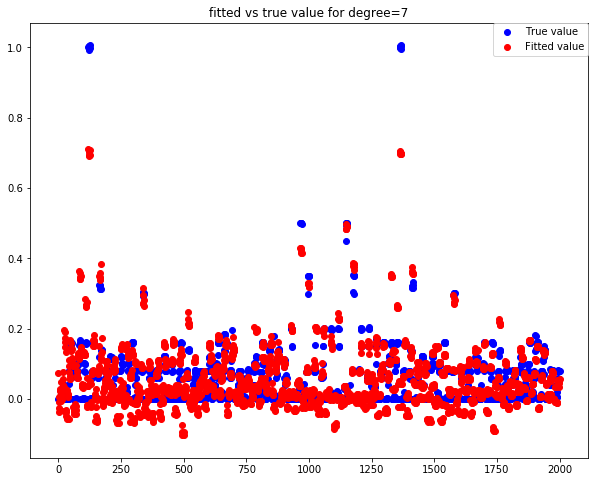

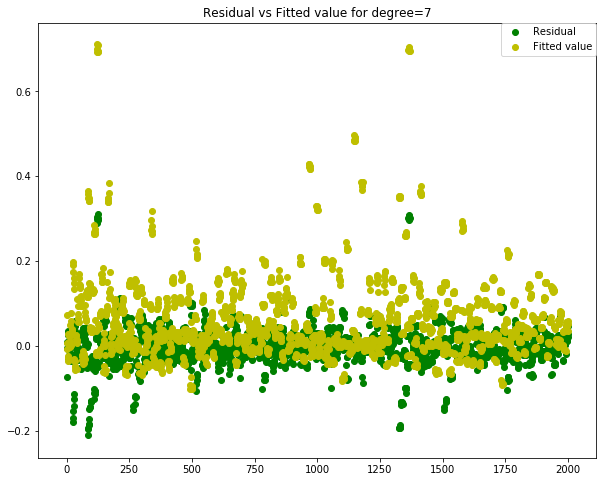

In [187]:
allpre_res = [0 for i in range(len(data))]
plotScatterd(pred, real,'degree=7')

In [188]:
#2e

In [189]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [190]:
data5 = pd.read_csv("network_backup_dataset.csv")
data5.drop('Backup Time (hour)', axis = 1, inplace = True)
backupsize = data5['Size of Backup (GB)']
y5=backupsize.values
training_label = np.asarray(data5['Size of Backup (GB)'].values, dtype=np.float)
v5=np.vstack(training_label)
data5.drop('Size of Backup (GB)', axis = 1, inplace = True)

In [194]:
new5= convert_to_scalar1(data5)
X5=new5.values

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold


In [197]:
train_rmse,test_rmse = [],[]
folds = 10
rmse_train,rmse_test = [],[]
min_test = 10
prediction = []
real = []
smallest = 0
for neighborsize in range(1, 50):
    foldnumber = KFold(n_splits = 10, random_state = None, shuffle = False)
    for train_index, test_index in foldnumber.split(new5):
        clf = KNeighborsRegressor(n_neighbors=neighborsize)
        X_train, X_test, y_train, y_test = train_test_split(X5, v5, train_size=0.9)
        pipeline = Pipeline([('KNN', clf)])
        pipeline.fit(X_train, y_train)
        train_predict = pipeline.predict(X_train)
        test_predict = pipeline.predict(X_test)
        rmse_train.append(np.sqrt(mean_squared_error(y_train, train_predict)))
        rmse_test.append(np.sqrt(mean_squared_error(y_test, test_predict)))   
    print("training RMSE: %lf" %(np.mean(rmse_train)), "testing RMSE: %lf" %(np.mean(rmse_test)))
    if min_test > np.mean(rmse_test):
        min_test = np.mean(rmse_test)
        smallest = neighborsize
    train_rmse.append(np.mean(rmse_train))
    test_rmse.append(np.mean(rmse_test))
    rmse_train = []
    rmse_test = []
print ("min test rmse: ", min_test, "at neighbour size: ", smallest)

training RMSE: 0.000000 testing RMSE: 0.052691
training RMSE: 0.029064 testing RMSE: 0.042065
training RMSE: 0.029409 testing RMSE: 0.037656
training RMSE: 0.027996 testing RMSE: 0.034104
training RMSE: 0.027444 testing RMSE: 0.036449
training RMSE: 0.029486 testing RMSE: 0.037287
training RMSE: 0.033653 testing RMSE: 0.044043
training RMSE: 0.037353 testing RMSE: 0.043065
training RMSE: 0.039804 testing RMSE: 0.046326
training RMSE: 0.041985 testing RMSE: 0.048137
training RMSE: 0.043809 testing RMSE: 0.051576
training RMSE: 0.045474 testing RMSE: 0.051663
training RMSE: 0.047010 testing RMSE: 0.053341
training RMSE: 0.048609 testing RMSE: 0.052040
training RMSE: 0.050116 testing RMSE: 0.055061
training RMSE: 0.050973 testing RMSE: 0.053112
training RMSE: 0.051696 testing RMSE: 0.053787
training RMSE: 0.051794 testing RMSE: 0.054499
training RMSE: 0.052067 testing RMSE: 0.052465
training RMSE: 0.052089 testing RMSE: 0.051857
training RMSE: 0.052670 testing RMSE: 0.053441
training RMSE

In [198]:
import matplotlib.pyplot as plt

for k in range(folds):
    clf = KNeighborsRegressor(n_neighbors=smallest)
    X_train, X_test, y_train, y_test = train_test_split(X5, v5, train_size=0.9)
    pipeline = Pipeline([("KNN", clf)])
    pipeline.fit(X_train, y_train)
    train_predict = pipeline.predict(X_train)
    test_predict = pipeline.predict(X_test)
    rmse_train.append(np.sqrt(mean_squared_error(y_train, train_predict)))
    rmse_test.append(np.sqrt(mean_squared_error(y_test, test_predict)))
    prediction.extend(test_predict)
    plot_gd=np.vstack(prediction)
    real.extend(y_test)
    plot_test=np.vstack(real)

In [199]:
def plotScatter5(Y_fitted,Y,regressor_name):
    index=[i for i in range(1,2001)]
    index=np.asarray(index)
    Y_plot=Y[0:2000]
    Y_fitted_plot=Y_fitted[0:2000]
    plt.figure(figsize=(10,8))
    plt.scatter(index,Y_plot,c='b',label='True value')
    plt.scatter(index,Y_fitted_plot,c='r',label='Fitted value')
    plt.title('fitted vs true value for '+regressor_name)
    plt.legend(loc=1,ncol=1, borderaxespad=0.)
    plt.show()
    Y_residual=Y_plot-Y_fitted_plot
    plt.figure(figsize=(10,8))
    plt.scatter(index,Y_residual,c='g',label='Residual')
    plt.scatter(index,Y_fitted_plot,c='y',label='Fitted value')
    plt.title('Residual vs Fitted value for '+regressor_name)
    plt.legend(loc=1,ncol=1, borderaxespad=0.)
    plt.show()

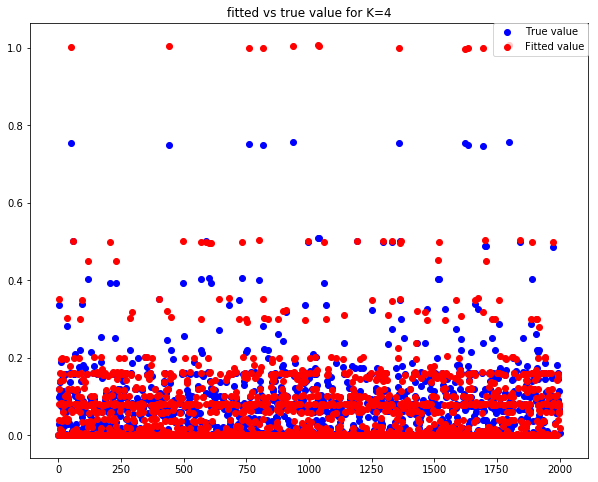

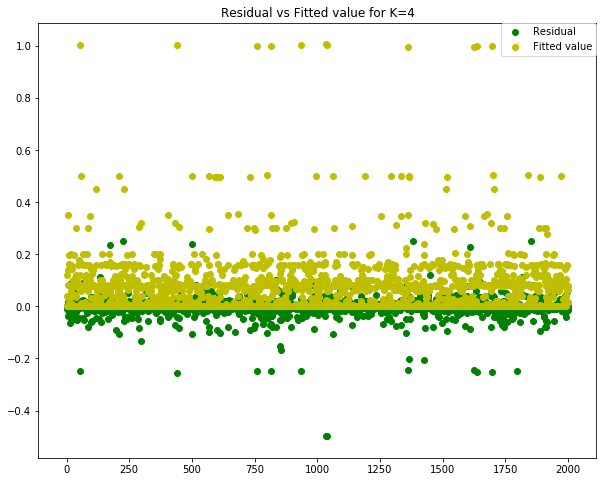

In [200]:
plotScatter5(plot_test, plot_gd,'K=4')